In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Hotel Booking Cancellation Prediction - Colab Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Avoid line wrapping

print("All libraries imported successfully!")

All libraries imported successfully!


# Step 1: Loading and checking the dataset

In [4]:
#@title Loading the Dataset

hotel_df = pd.read_csv('/content/drive/MyDrive/Hotel_Cancellation_Prediction/Dataset/hotel_booking.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
#@title ## Univariate Exploratory Data Analysis

print("Univariate EDA - Basic Information")
print("=" * 50)

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(hotel_df.describe())

# Display descriptive statistics for categorical columns
print("\nDescriptive Statistics for Categorical Columns:")
display(hotel_df.describe(include='object'))


Univariate EDA - Basic Information

Descriptive Statistics for Numerical Columns:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000



Descriptive Statistics for Categorical Columns:


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,422-804-6403,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28



Univariate EDA - Distribution of Key Categorical Features


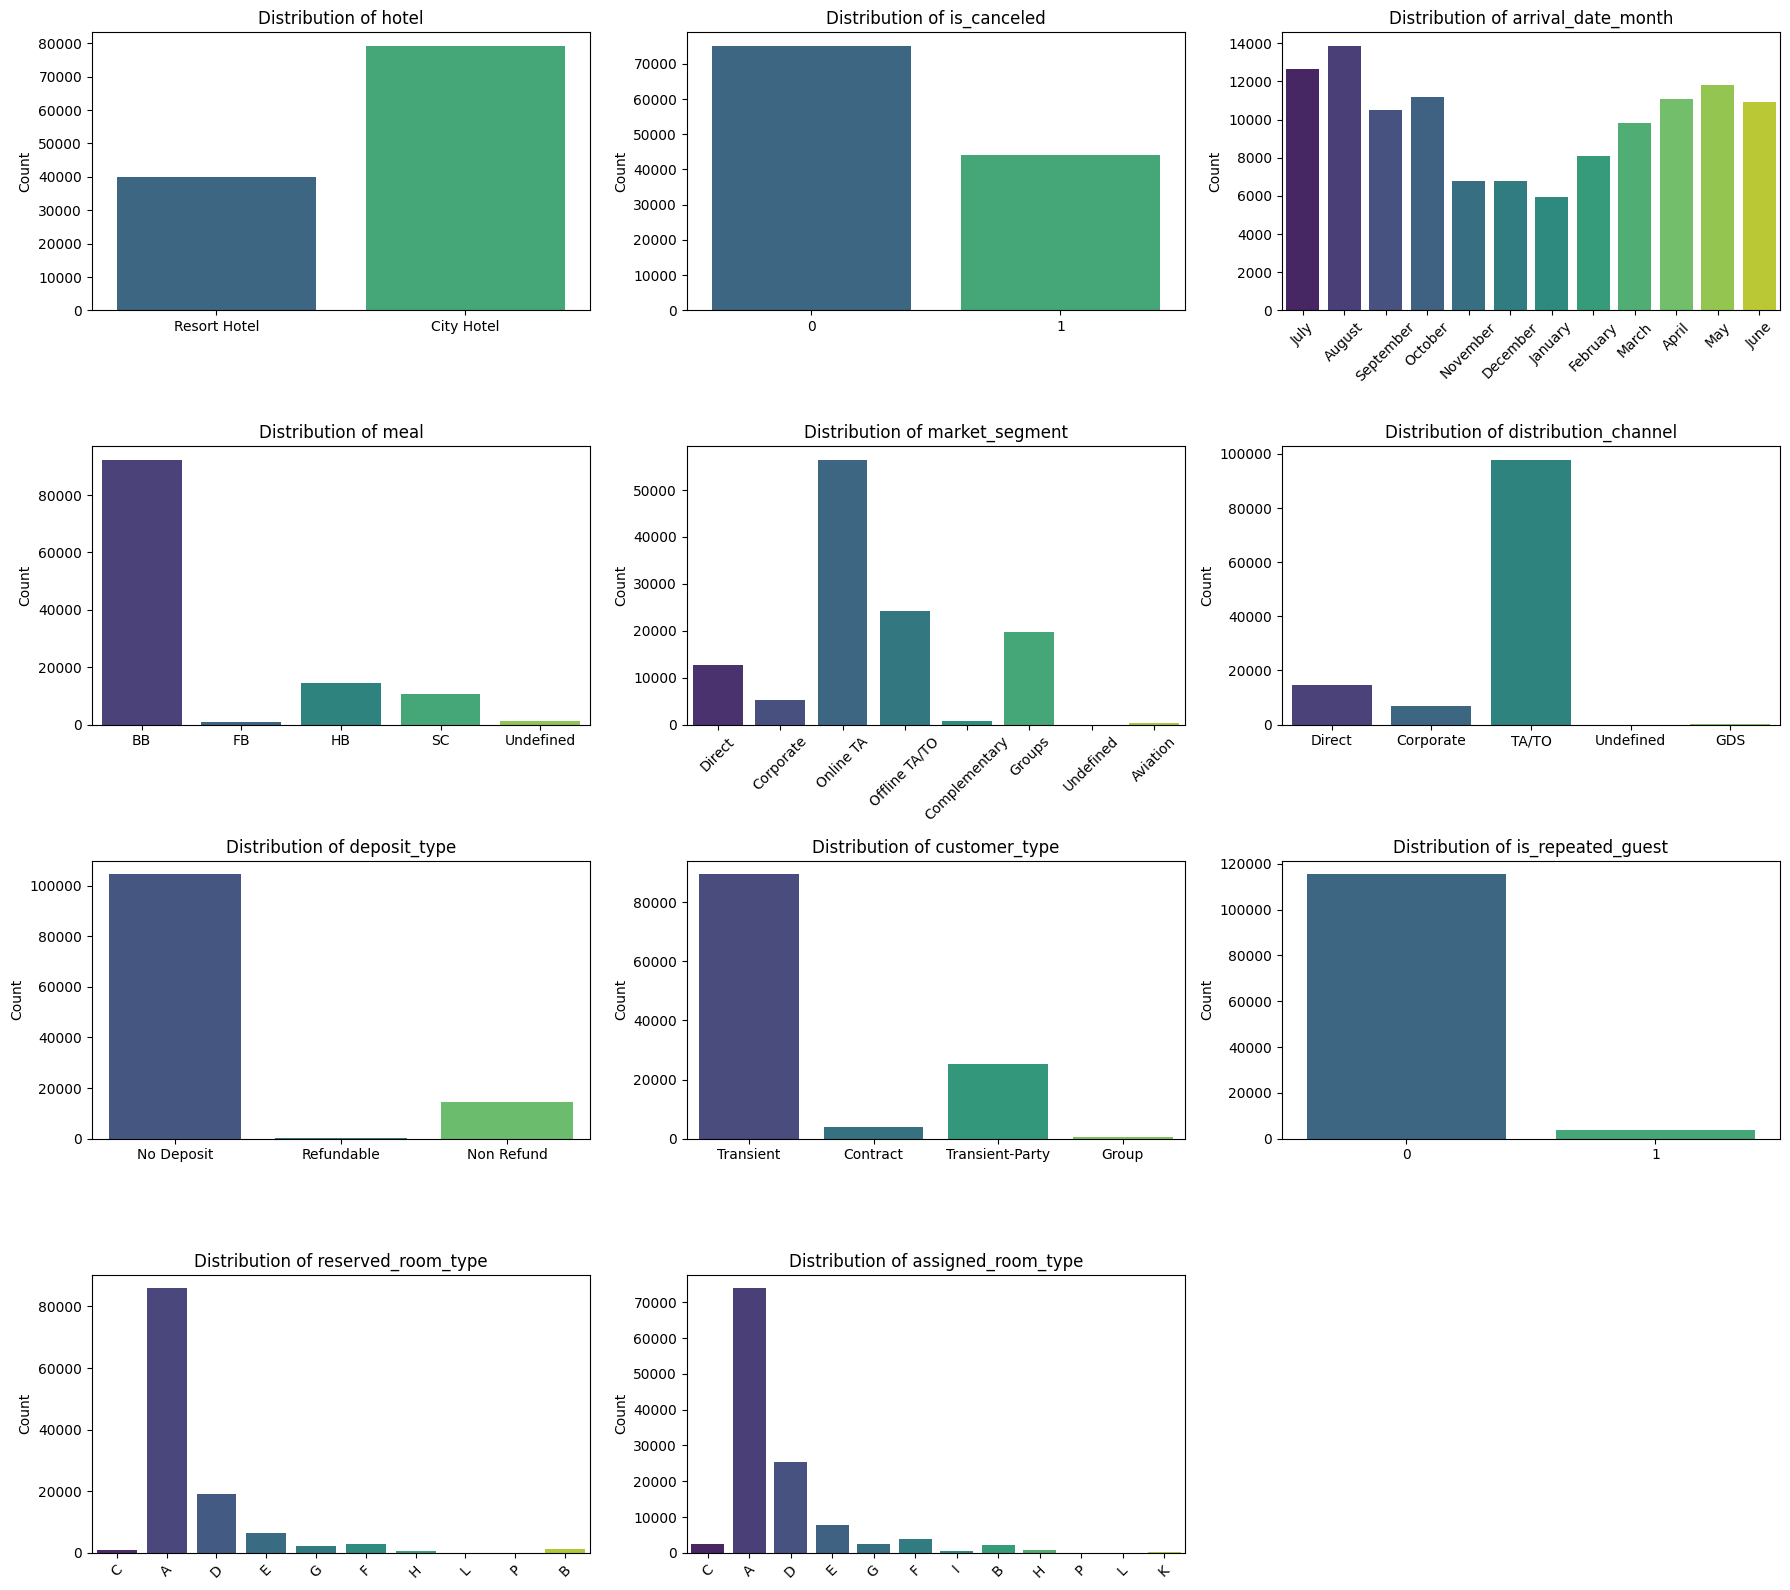

In [7]:
#@title ## Univariate EDA - Distribution of Key Categorical Features
print("\nUnivariate EDA - Distribution of Key Categorical Features")
print("=" * 60)

categorical_features = [
    'hotel', 'is_canceled', 'arrival_date_month', 'meal',
    'market_segment', 'distribution_channel', 'deposit_type',
    'customer_type', 'is_repeated_guest', 'reserved_room_type',
    'assigned_room_type'
]

# Filter out features that are not in hotel_df.columns
actual_categorical_features = [f for f in categorical_features if f in hotel_df.columns]

if not actual_categorical_features:
    print("No categorical features found to plot.")
else:
    # Define the number of columns per row
    n_cols = 3
    # Calculate the number of rows needed
    n_rows = (len(actual_categorical_features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
    # Flatten axes for easy iteration, handle case where n_rows=1
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, feature in enumerate(actual_categorical_features):
        # Use sns.countplot with x=feature for vertical bars
        sns.countplot(data=hotel_df, x=feature, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel('')  # Remove x-label to avoid clutter as feature name is in title
        axes[i].set_ylabel('Count')
        # Rotate x-axis labels if there are many categories for better readability
        if hotel_df[feature].nunique() > 5:
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].tick_params(axis='x', rotation=0)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


Univariate EDA - Distribution of Key Numerical Features


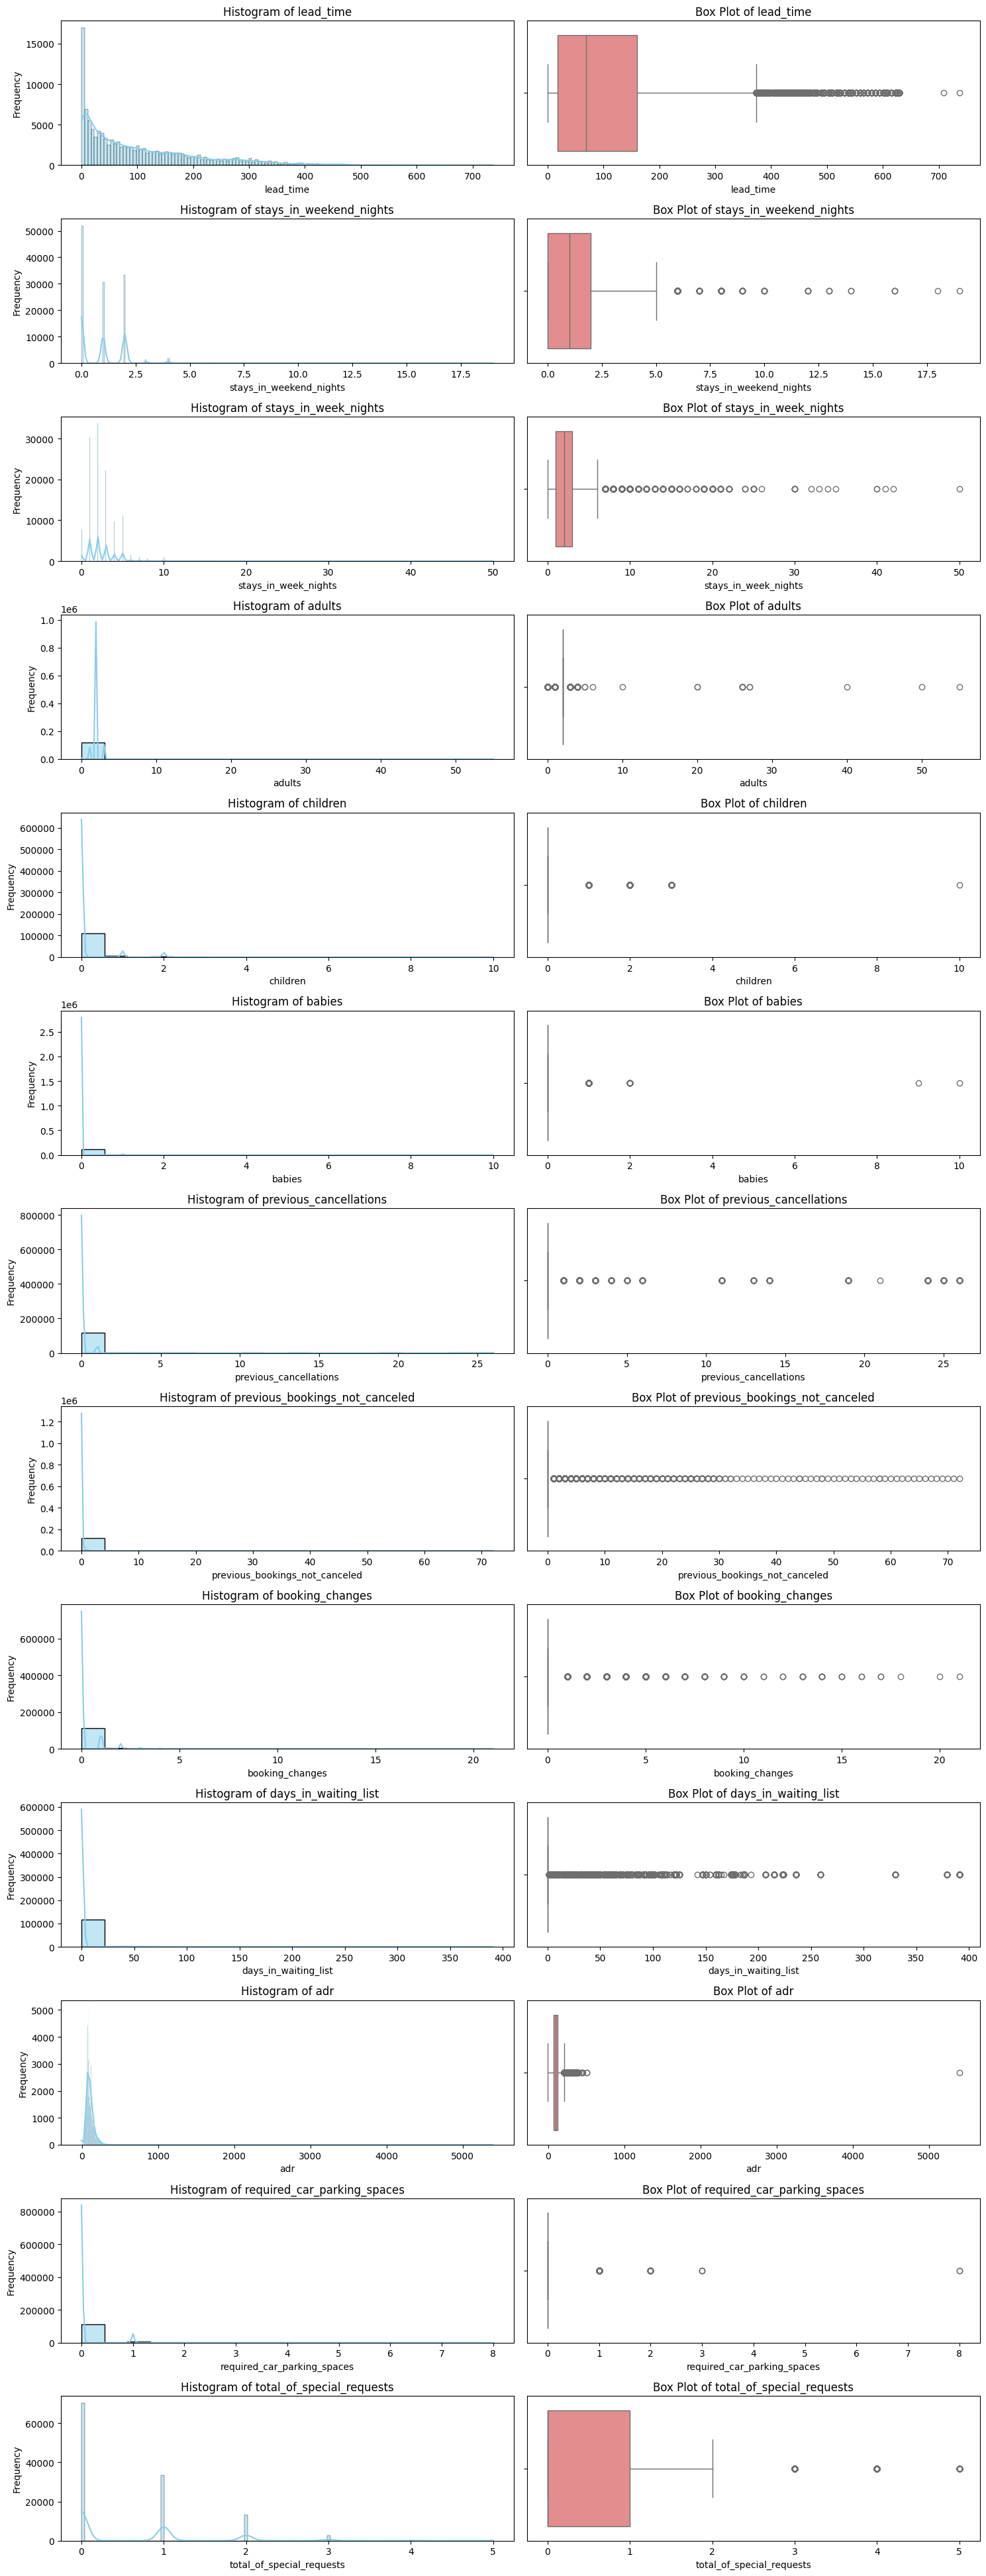

In [8]:
#@title ## Univariate EDA - Distribution of Key Numerical Features
print("\nUnivariate EDA - Distribution of Key Numerical Features")
print("=" * 60)

numerical_features = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests'
]

fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 3 * len(numerical_features)))
axes = axes.flatten() if len(numerical_features) > 1 else [axes]

for i, feature in enumerate(numerical_features):
    if feature in hotel_df.columns:
        sns.histplot(data=hotel_df, x=feature, kde=True, ax=axes[2*i], color='skyblue')
        axes[2*i].set_title(f'Histogram of {feature}')
        axes[2*i].set_xlabel(feature)
        axes[2*i].set_ylabel('Frequency')

        sns.boxplot(data=hotel_df, x=feature, ax=axes[2*i+1], color='lightcoral')
        axes[2*i+1].set_title(f'Box Plot of {feature}')
        axes[2*i+1].set_xlabel(feature)

    else:
        axes[2*i].set_visible(False)
        axes[2*i+1].set_visible(False)

plt.tight_layout()
plt.show()

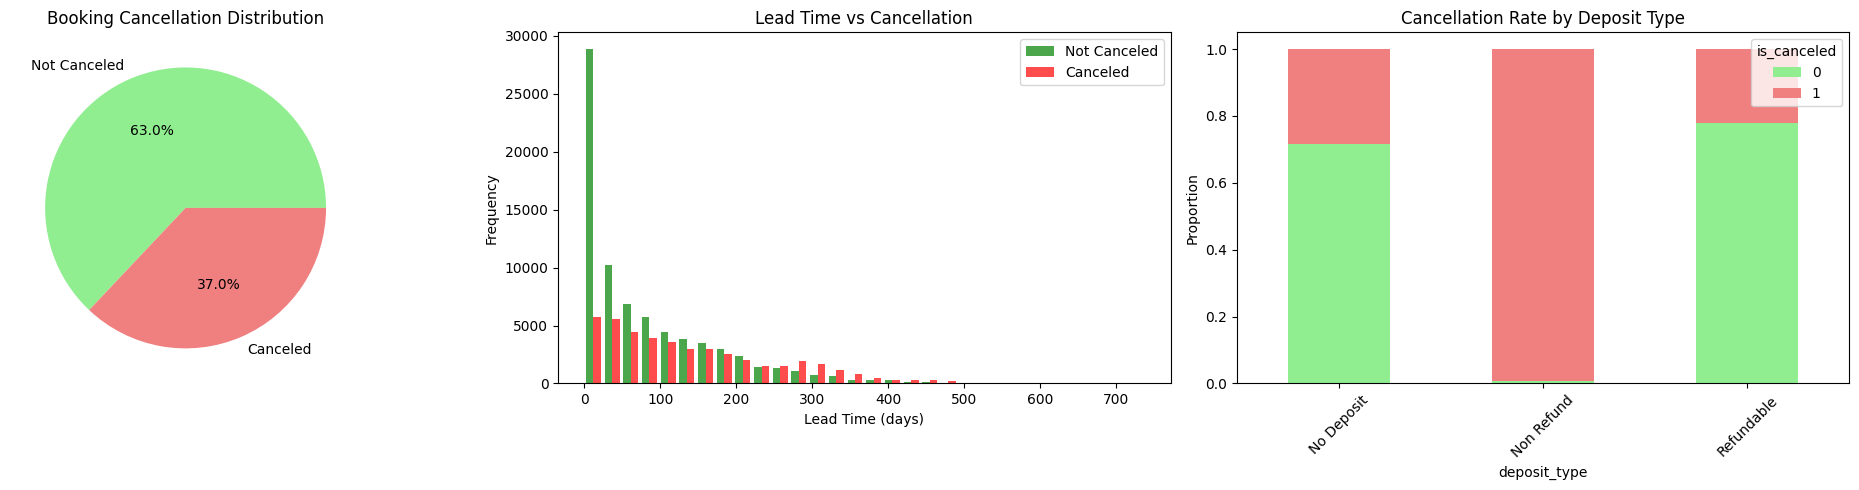


 Cancellation Rates by Key Features:


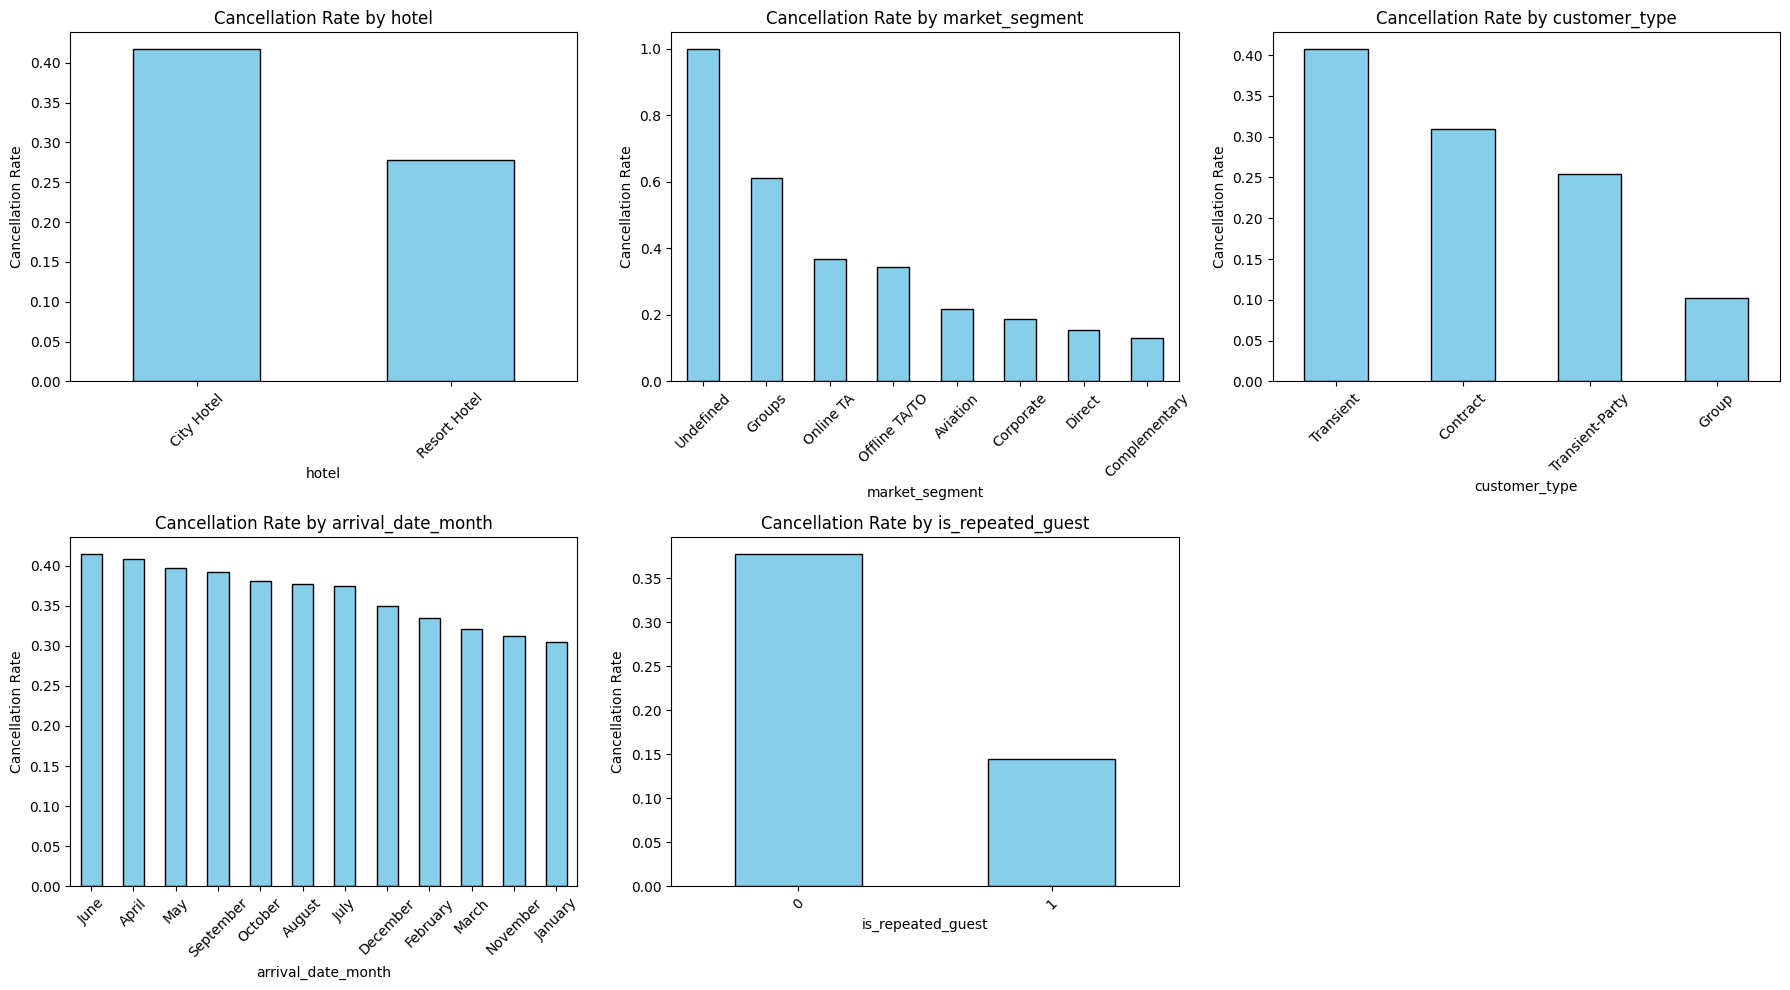

In [9]:
#@title ## Bivariate EDA

plt.figure(figsize=(20, 5)) # Increased figure width to accommodate 3 plots

plt.subplot(1, 3, 1)
cancellation_counts = hotel_df['is_canceled'].value_counts()
plt.pie(cancellation_counts.values, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Booking Cancellation Distribution')

plt.subplot(1, 3, 2)
# Lead time analysis
plt.hist([hotel_df[hotel_df['is_canceled'] == 0]['lead_time'],
          hotel_df[hotel_df['is_canceled'] == 1]['lead_time']],
         bins=30, alpha=0.7, label=['Not Canceled', 'Canceled'], color=['green', 'red'])
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Lead Time vs Cancellation')

plt.subplot(1, 3, 3)
# Deposit type analysis
deposit_cancel = pd.crosstab(hotel_df['deposit_type'], hotel_df['is_canceled'], normalize='index')
deposit_cancel.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'], ax=plt.gca()) # ax=plt.gca() ensures it plots on the current subplot
plt.title('Cancellation Rate by Deposit Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Key features correlation with cancellation
print("\n Cancellation Rates by Key Features:")
key_features = ['hotel', 'market_segment', 'customer_type', 'arrival_date_month', 'is_repeated_guest']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    cancellation_rate = hotel_df.groupby(feature)['is_canceled'].mean().sort_values(ascending=False)
    cancellation_rate.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Cancellation Rate by {feature}')
    axes[i].set_ylabel('Cancellation Rate')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

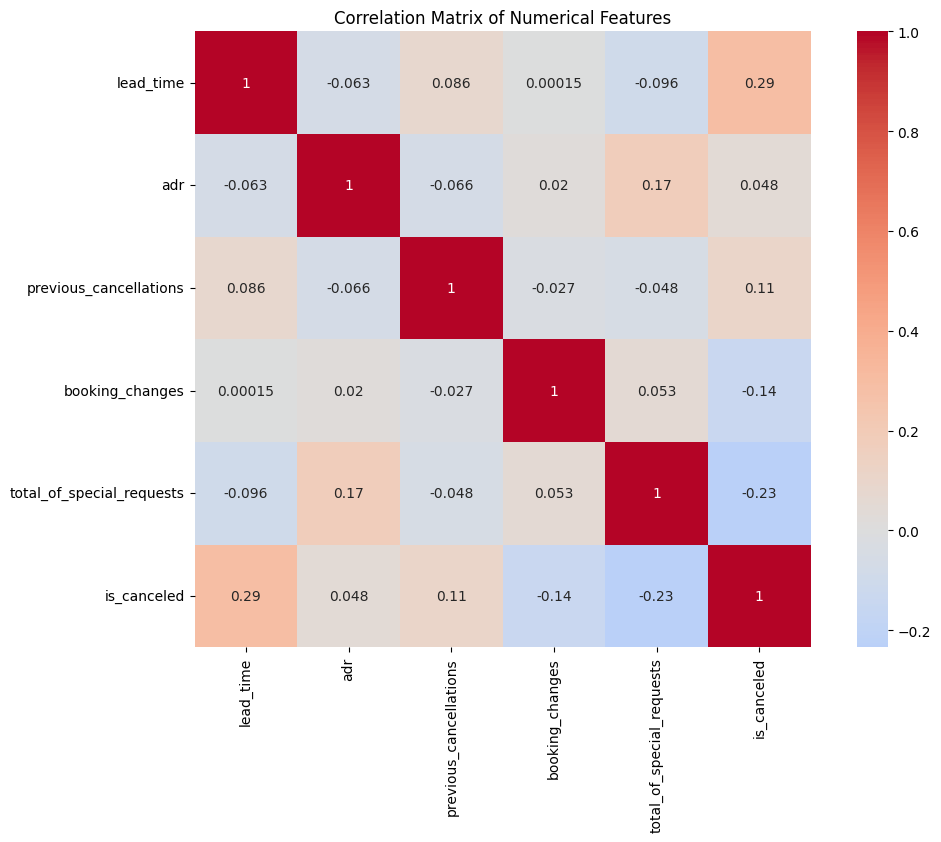

In [10]:
#@title ## Multivariate EDA

# Numerical features correlation
numerical_features = ['lead_time', 'adr', 'previous_cancellations', 'booking_changes', 'total_of_special_requests']

plt.figure(figsize=(12, 8))
correlation_matrix = hotel_df[numerical_features + ['is_canceled']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [11]:
#@title ## Handle missing values in the dataset
"""Handle missing values in the dataset"""
print("   Handling missing values...")

# For children, replace NaN with 0
if 'children' in hotel_df.columns:
    hotel_df['children'] = hotel_df['children'].fillna(0)

# For country, replace with 'Unknown'
if 'country' in hotel_df.columns:
    hotel_df['country'] = hotel_df['country'].fillna('Unknown')

# For agent and company, create indicator for missing
if 'agent' in hotel_df.columns:
    # hotel_df['agent_missing'] = hotel_df['agent'].isna().astype(int)
    hotel_df['agent'] = hotel_df['agent'].fillna(0)

if 'company' in hotel_df.columns:
    # hotel_df['company_missing'] = hotel_df['company'].isna().astype(int)
    hotel_df['company'] = hotel_df['company'].fillna(0)

display(hotel_df.isnull().sum().sort_values(ascending=False).head(10))

   Handling missing values...


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [12]:
#@title ## Create new engineered features
"""Create new engineered features"""
print("   Creating new features...")

# Total guests
hotel_df['total_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

# Total stay duration
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights'] if 'stays_in_weekend_nights' in hotel_df.columns else 1

# Family booking indicator
hotel_df['is_family'] = ((hotel_df['adults'] > 0) & ((hotel_df['children'] > 0) | (hotel_df['babies'] > 0))).astype(int)

# Booking season
try:
    hotel_df['arrival_date'] = pd.to_datetime(hotel_df['arrival_date_year'].astype(str) + '-' +
                                        hotel_df['arrival_date_month'] + '-' +
                                        hotel_df['arrival_date_day_of_month'].astype(str))
    hotel_df['arrival_season'] = hotel_df['arrival_date'].dt.month % 12 // 3 + 1
except:
    hotel_df['arrival_season'] = 1  # Default season

# Special requests per night
hotel_df['requests_per_night'] = hotel_df['total_of_special_requests'] / np.maximum(hotel_df['total_stay'], 1)

# High lead time indicator
hotel_df['high_lead_time'] = (hotel_df['lead_time'] > 100).astype(int)

# Has previous cancellations
hotel_df['has_previous_cancellations'] = (hotel_df['previous_cancellations'] > 0).astype(int)

print("   New features created and added in dataframe.")


   Creating new features...
   New features created and added in dataframe.


In [15]:
#@title ## Encode categorical variables
encoders = {}

"""Encode categorical variables"""
print("Encoding categorical features...")

categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country',
                        'market_segment', 'distribution_channel',
                        'reserved_room_type', 'assigned_room_type',
                        'deposit_type', 'customer_type']

for col in categorical_columns:
    if col in hotel_df.columns:
        if col not in encoders:
            encoders[col] = LabelEncoder()
            # Handle unseen values
            hotel_df[col] = hotel_df[col].astype(str)
            encoders[col].fit(hotel_df[col])
        hotel_df[col] = encoders[col].transform(hotel_df[col])
print("Categorical features encoded.")

display(hotel_df.head())

Encoding categorical features...
Categorical features encoded.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_guests,total_stay,is_family,arrival_date,arrival_season,requests_per_night,high_lead_time,has_previous_cancellations
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0.0,0,2,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,2.0,0,0,2015-07-01,3,0.0,1,0
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0.0,0,2,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,2.0,0,0,2015-07-01,3,0.0,1,0
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0.0,0,2,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1.0,1,0,2015-07-01,3,0.0,0,0
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0.0,0,2,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1.0,1,0,2015-07-01,3,0.0,0,0
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0.0,0,2,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2.0,2,0,2015-07-01,3,0.5,0,0


In [16]:
#@title ## Scale numerical features
scalers = {}

"""Scale numerical features"""
print("Scaling numerical features...")

numerical_columns = ['lead_time', 'total_stay', 'total_guests',
                    'previous_cancellations', 'previous_bookings_not_canceled',
                    'booking_changes', 'days_in_waiting_list', 'adr',
                    'required_car_parking_spaces', 'total_of_special_requests']

for col in numerical_columns:
    if col in hotel_df.columns:
        if col not in scalers:
            scalers[col] = StandardScaler()
            hotel_df[col] = scalers[col].fit_transform(hotel_df[[col]])
        else:
            hotel_df[col] = scalers[col].transform(hotel_df[[col]])
print("Numerical features scaled.")

Scaling numerical features...
Numerical features scaled.


In [18]:
#@title ## Creating clean csv file

hotel_df.to_csv("/content/drive/MyDrive/Hotel_Cancellation_Prediction/Dataset/hotel_booking_clean.csv", index=False)


